In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Question 1: Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [3]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [6]:
columns,row=df.shape

In [7]:
columns

10683

In [8]:
row

11

# Question 2 : What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution

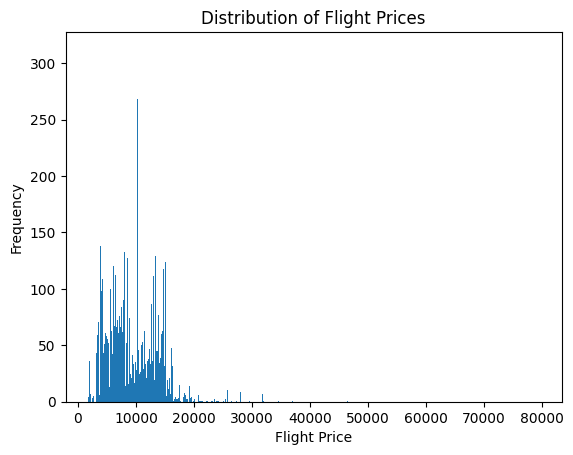

In [9]:
flight_prices=df['Price']

plt.hist(flight_prices,bins=1000)
plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.title("Distribution of Flight Prices")

plt.show()

# Question 3 : What is the range of prices in the dataset? What is the minimum and maximum price?

In [10]:
min=df['Price'].min()

In [11]:
max=df['Price'].max()

In [12]:
range= max-min

In [13]:
print('Min:',min , '\nMax:',max,'\nRange:',range)

Min: 1759 
Max: 79512 
Range: 77753


# Question 4 : How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines

Text(0.5, 1.0, 'Price Variation by Airline')

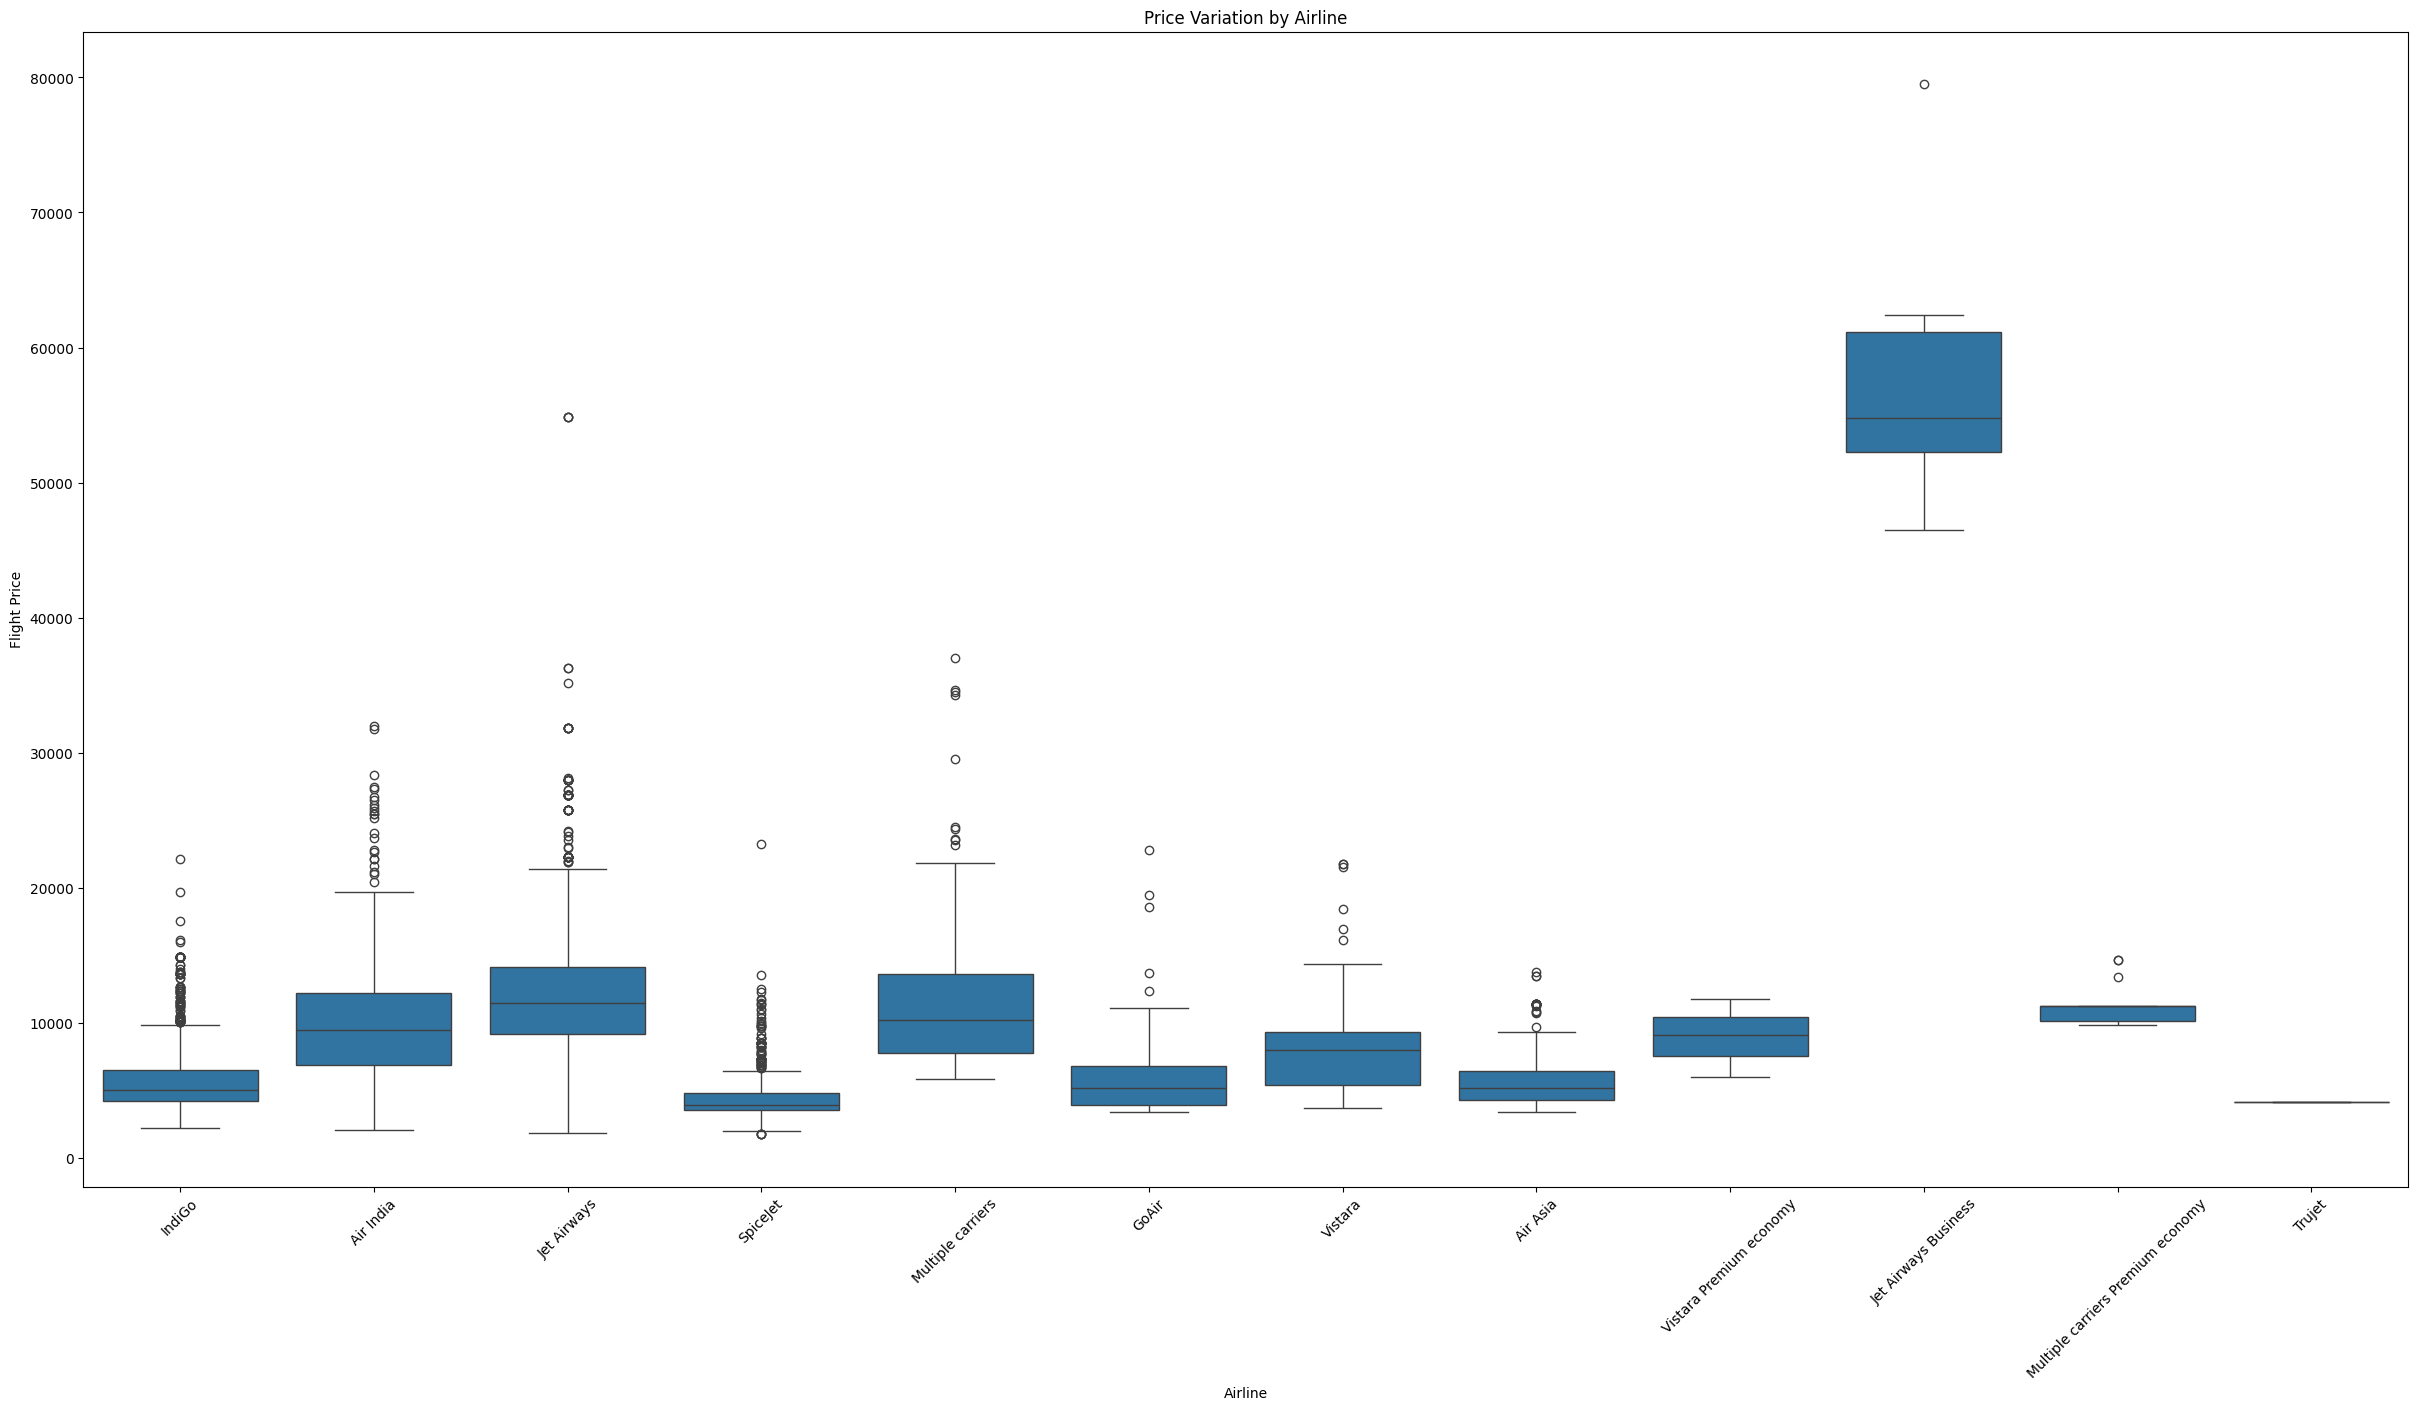

In [14]:
plt.figure(figsize=(30,15))
sns.boxplot(x='Airline',y='Price',data=df)

plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.xticks(rotation=45)
plt.title('Price Variation by Airline')

# Question 5 : Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

<Axes: ylabel='Price'>

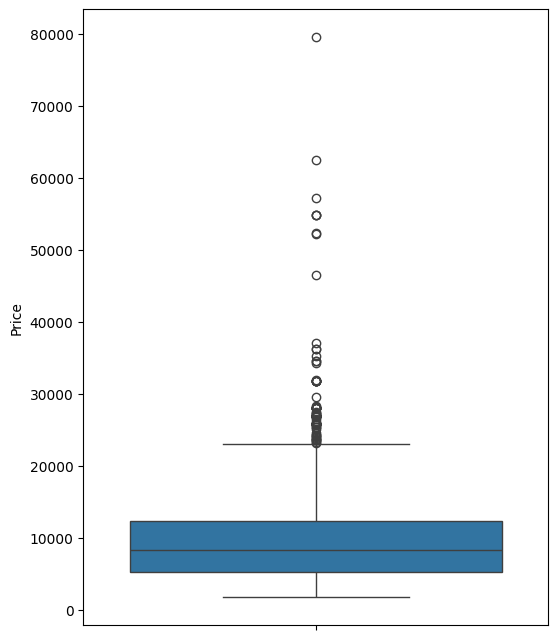

In [15]:
plt.figure(figsize=(6,8))
sns.boxplot(y='Price',data=df)

Outliers can skew statistical measures, such as the mean and standard deviation, and can influence data patterns and trends.

Outliers may indicate interesting insights or anomalies in the data, but they can also distort statistical summaries or models if not handled appropriately.

# Question 6 : You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [18]:
df['date']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [19]:
df['date']=df['date'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)

In [20]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


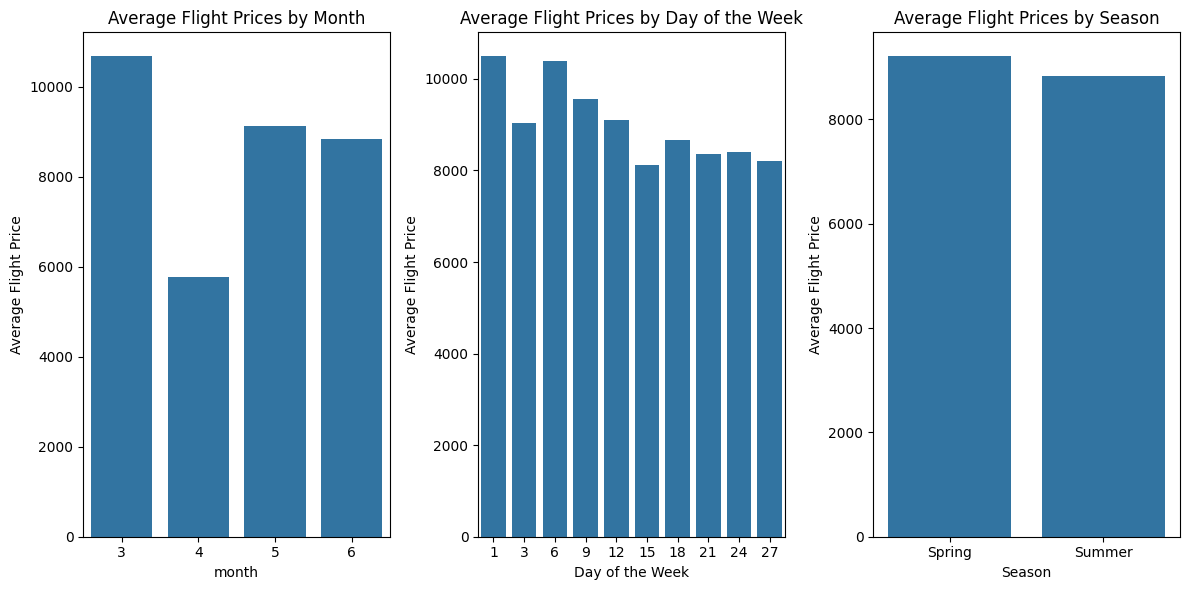

In [21]:
monthly_prices=df.groupby('month')['Price'].mean().reset_index()

day_prices=df.groupby('date')['Price'].mean().reset_index()

df['Season']=df['month'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Fall',10:'Fall',11:'Fall',12:'Winter'})
seasonal_prices=df.groupby('Season')['Price'].mean().reset_index()

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.barplot(x='month',y='Price',data=monthly_prices)
plt.xlabel('month')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Month')

plt.subplot(1,3,2)
sns.barplot(x='date',y='Price',data=day_prices)
plt.xlabel('Day of the Week')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Day of the Week')

plt.subplot(1,3,3)
sns.barplot(x='Season',y='Price',data=seasonal_prices)
plt.xlabel('Season')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Season')

plt.tight_layout()
plt.show()

# Question 7 : You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [25]:
df['Duration_hours']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_minutes']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df.drop(['Duration'],axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,date,month,year,Season,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,1970-01-01 00:00:00.000000024,1,2019,Spring,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1970-01-01 00:00:00.000000001,1,2019,Spring,7,25


In [30]:
df[df['Duration_hours']=='5m']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,date,month,year,Season,Duration_hours,Duration_minutes
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,2 stops,No info,17327,1970-01-01 00:00:00.000000006,1,2019,Spring,5m,NaN


In [32]:
df.drop(index=6474,inplace=True)

In [33]:
df['Duration_hours']=df['Duration_hours'].astype(float)

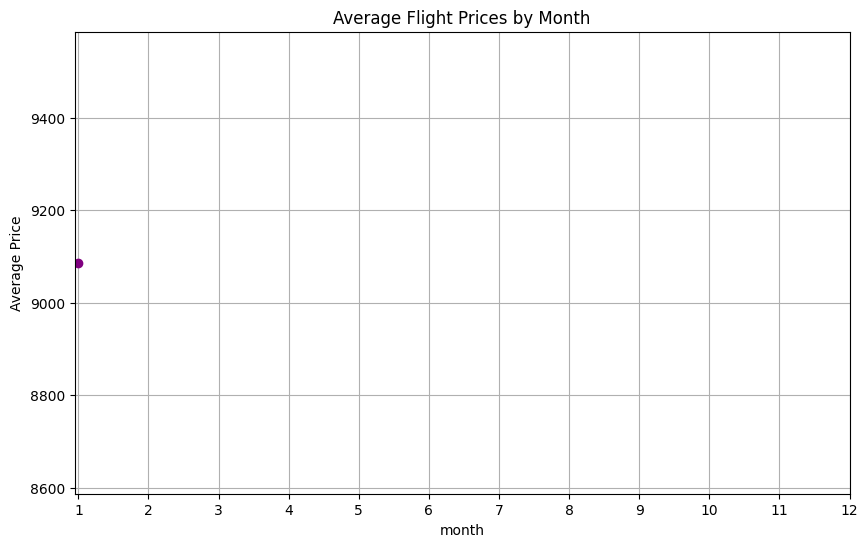

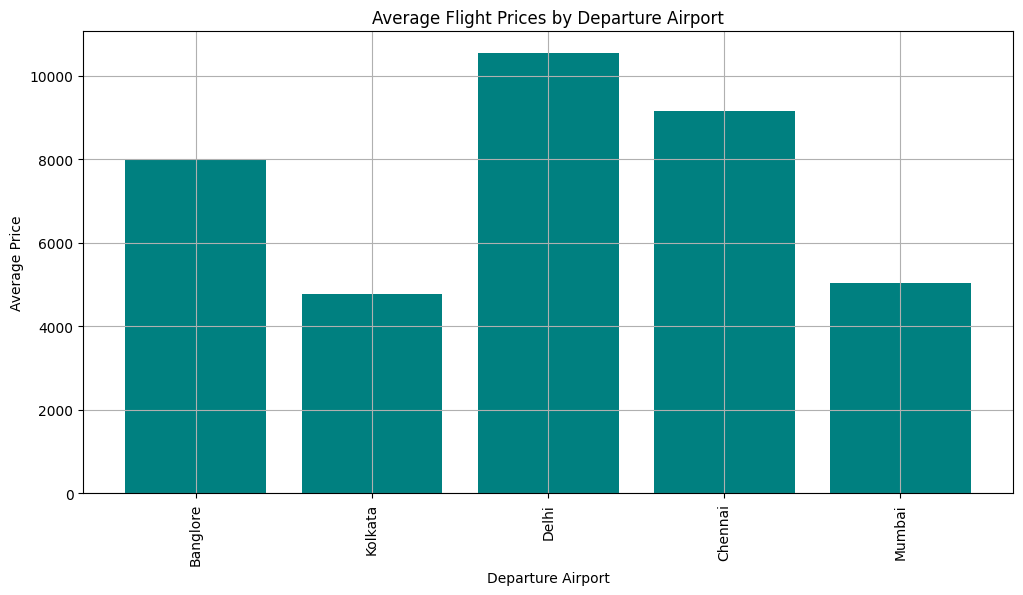

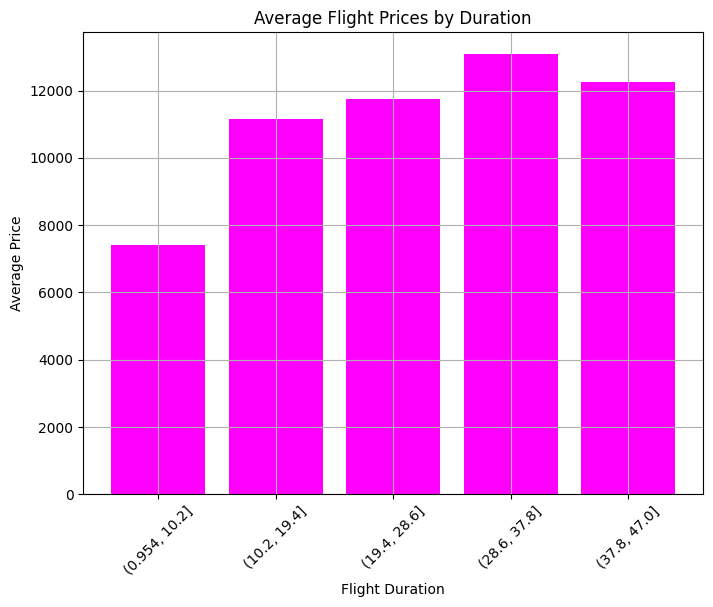

In [34]:


# Analyze trends based on date and time
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
monthly_avg_prices = df.groupby('month')['Price'].mean()

# Create a line plot for average monthly prices
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_prices.index, monthly_avg_prices.values, marker='o', color='purple', linewidth=2)
plt.xlabel('month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.gca().set_xticks(np.arange(1, 13))  # Set x-axis ticks to represent months
plt.grid(True)
plt.show()

# Analyze trends based on departure and arrival airports
departure_airports = df['Source'].unique()
avg_prices_by_airport = df.groupby('Source')['Price'].mean()

# Create a bar chart for average prices by departure airport
plt.figure(figsize=(12, 6))
plt.bar(departure_airports, avg_prices_by_airport, color='teal')
plt.xlabel('Departure Airport')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Departure Airport')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Analyze trends based on flight duration
duration_bins = pd.cut(df['Duration_hours'], bins=5)
avg_prices_by_duration = df.groupby(duration_bins)['Price'].mean()

# Create a bar chart for average prices by flight duration
plt.figure(figsize=(8, 6))
plt.bar(avg_prices_by_duration.index.astype(str), avg_prices_by_duration, color='magenta')
plt.xlabel('Flight Duration')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Duration')
plt.xticks(rotation=45)
plt.grid(True)

# Question 8 : You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [38]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,date,month,year,Season,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,1970-01-01 00:00:00.000000024,1,2019,Spring,2.0,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1970-01-01 00:00:00.000000001,1,2019,Spring,7.0,25


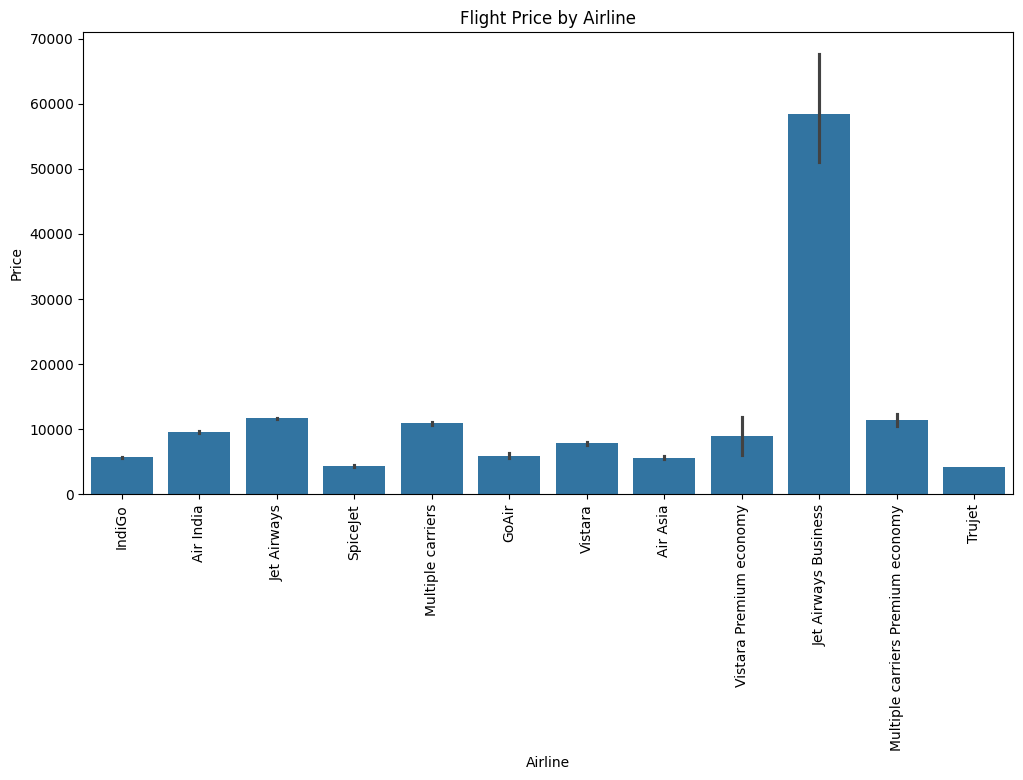

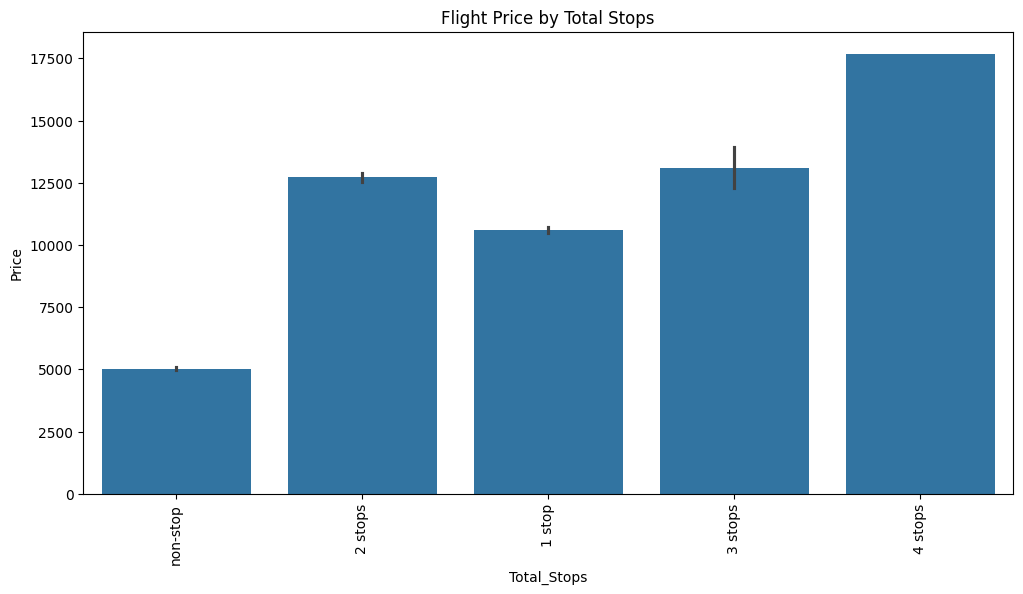

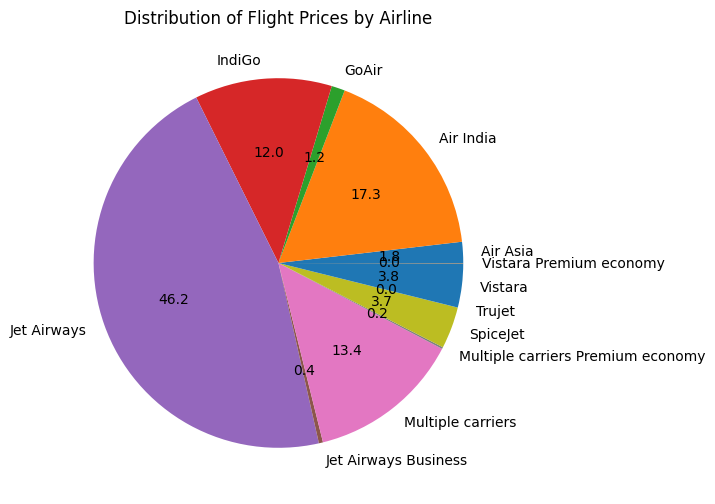

In [35]:

plt.figure(figsize=(12,6))
sns.barplot(x='Airline',y='Price',data=df)
plt.title('Flight Price by Airline')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x='Total_Stops',y='Price',data=df)
plt.title('Flight Price by Total Stops')
plt.xticks(rotation=90)
plt.show()


airline_price=df.groupby('Airline')['Price'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.pie(airline_price['Price'],labels=airline_price['Airline'],autopct='%1.1f')
plt.title('Distribution of Flight Prices by Airline')
plt.show()

# Question 9 : Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [39]:
df1=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [40]:
df1.shape

(10841, 13)

In [41]:
columns,row=df1.shape

In [42]:
columns

10841

In [43]:
row

13

# Question 10 : How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

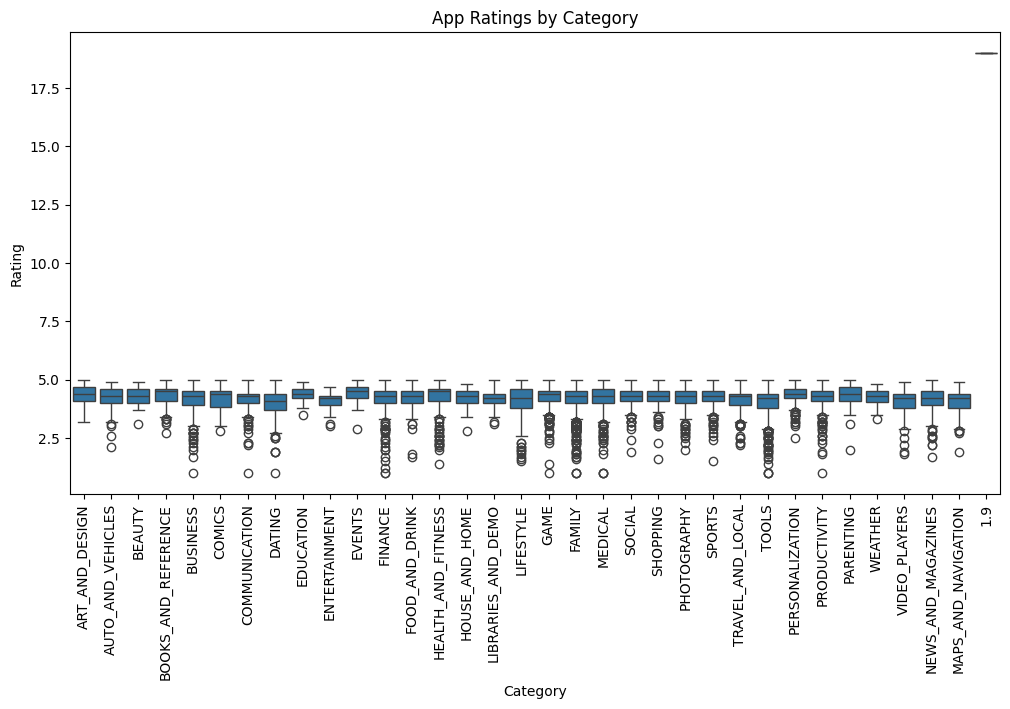

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Category',y='Rating',data=df1)
plt.title('App Ratings by Category')
plt.xticks(rotation=90)
plt.show()

# Question 11 : Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [46]:
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Missing values can impact your analysis in several ways. If a column has a large number of missing values, it may not be reliable for analysis. You may need to impute or remove the missing values before performing any analysis. If a column has only a few missing values, you may be able to ignore them or impute them without significantly impacting your results.

The specific impact of missing values on your analysis will depend on the nature of the data and the analysis you are performing. It is important to carefully consider how to handle missing values before proceeding with your analysis.

# Question 12 : What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship

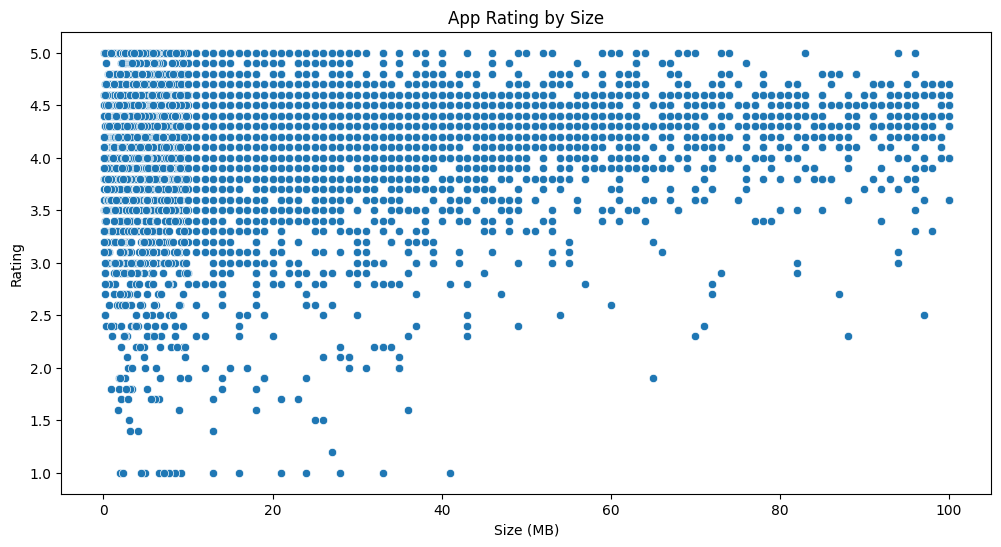

In [48]:
df1['Size']=df1['Size'].apply(lambda x:float(x.replace('M','')) if 'M' in x else (float(x.replace('k',''))/1024 if 'k' in x else None))

plt.figure(figsize=(12,6))
sns.scatterplot(x='Size',y='Rating',data=df1)
plt.title('App Rating by Size')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

# Question 13 : How does the type of app affect its price? Create a bar chart to compare average prices by app type.

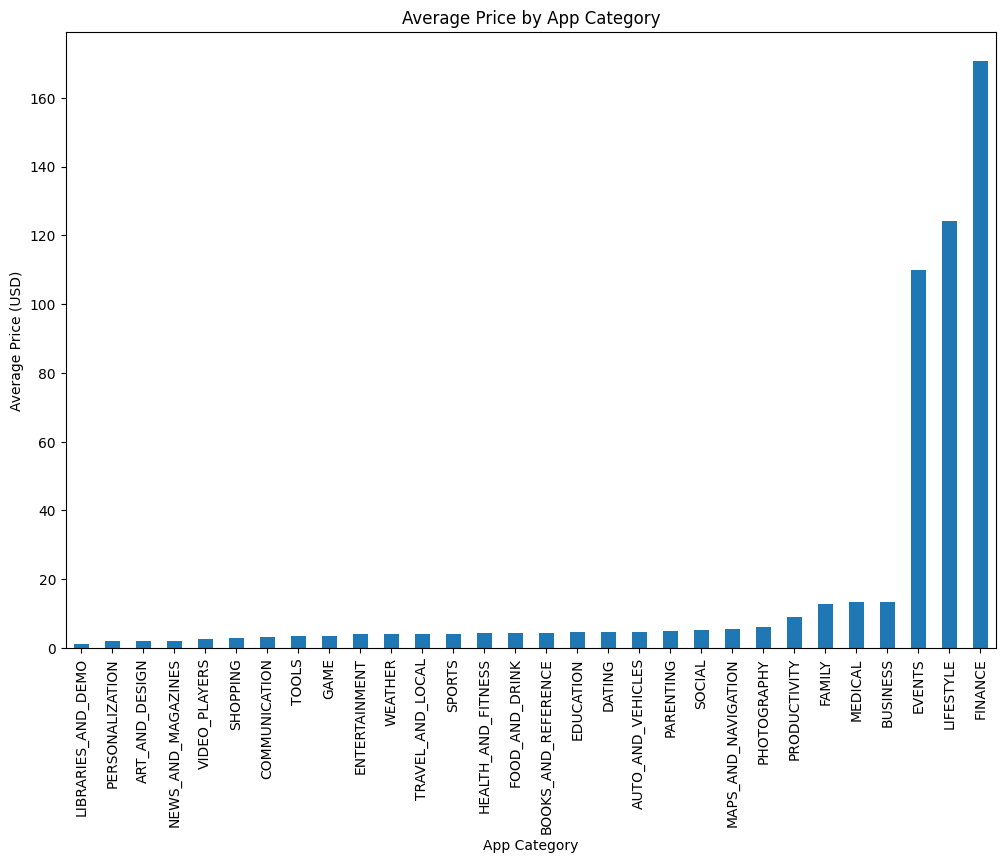

In [62]:
df2=df1
# Clean the data
# Drop rows with missing values in 'Type', 'Price', or 'Category' columns
df1 = df1.dropna(subset=['Type', 'Price', 'Category'])

# Keep only paid apps
df1=df1[df1['Type'] == 'Paid']

# Convert the 'Price' column to numeric, stripping the '$' sign

#df1['Price'] = df1['Price'].str.replace('$', '').astype(float)    # we already run it one times so it was not running but for first time you have to convert it into float

# Calculate average price by app category
avg_price_by_category = df1.groupby('Category')['Price'].mean().sort_values()

# Plot the data
plt.figure(figsize=(12, 8))
avg_price_by_category.plot(kind='bar')
plt.title('Average Price by App Category')
plt.xlabel('App Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=90)
plt.show()


# Question 14 : What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [63]:
install_counts=df1['Installs'].value_counts()
top_10_apps=install_counts.head(10)
print(top_10_apps)

Installs
1,000+        149
10,000+       129
100+           96
100,000+       90
10+            70
5,000+         67
50,000+        43
500+           40
50+            34
1,000,000+     24
Name: count, dtype: int64


# Question 15 : A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [65]:
dataset=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
category_popularity=dataset.groupby('Category')['Installs'].sum().sort_values(ascending=False)

top_10_categories=category_popularity.head(10)

frequency_table=pd.DataFrame({'Category':top_10_categories.index, 'Total Installs':top_10_categories.values})

print(frequency_table)

              Category                                     Total Installs
0                  1.9                                               Free
1         PRODUCTIVITY  500,000,000+10,000,000+100,000,000+10,000,000+...
2               BEAUTY  500,000+1,000,000+100,000+500,000+1,000,000+50...
3               FAMILY  50,000,000+10,000,000+100,000,000+1,000,000+5,...
4              WEATHER  50,000,000+1,000,000+50,000,000+10,000+10,000,...
5      PERSONALIZATION  50,000,000+1,000,000+100,000,000+5,000,000+100...
6   LIBRARIES_AND_DEMO  50,000+10,000+100,000+1,000+100,000+10,000+100...
7            LIFESTYLE  5,000,000+10,000,000+100,000+10,000,000+5,000,...
8  BOOKS_AND_REFERENCE  100,000,000+50,000+100,000+10,000,000+100,000,...
9  MAPS_AND_NAVIGATION  100,000,000+5,000,000+10,000,000+10,000,000+5,...


# Question 16 : A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

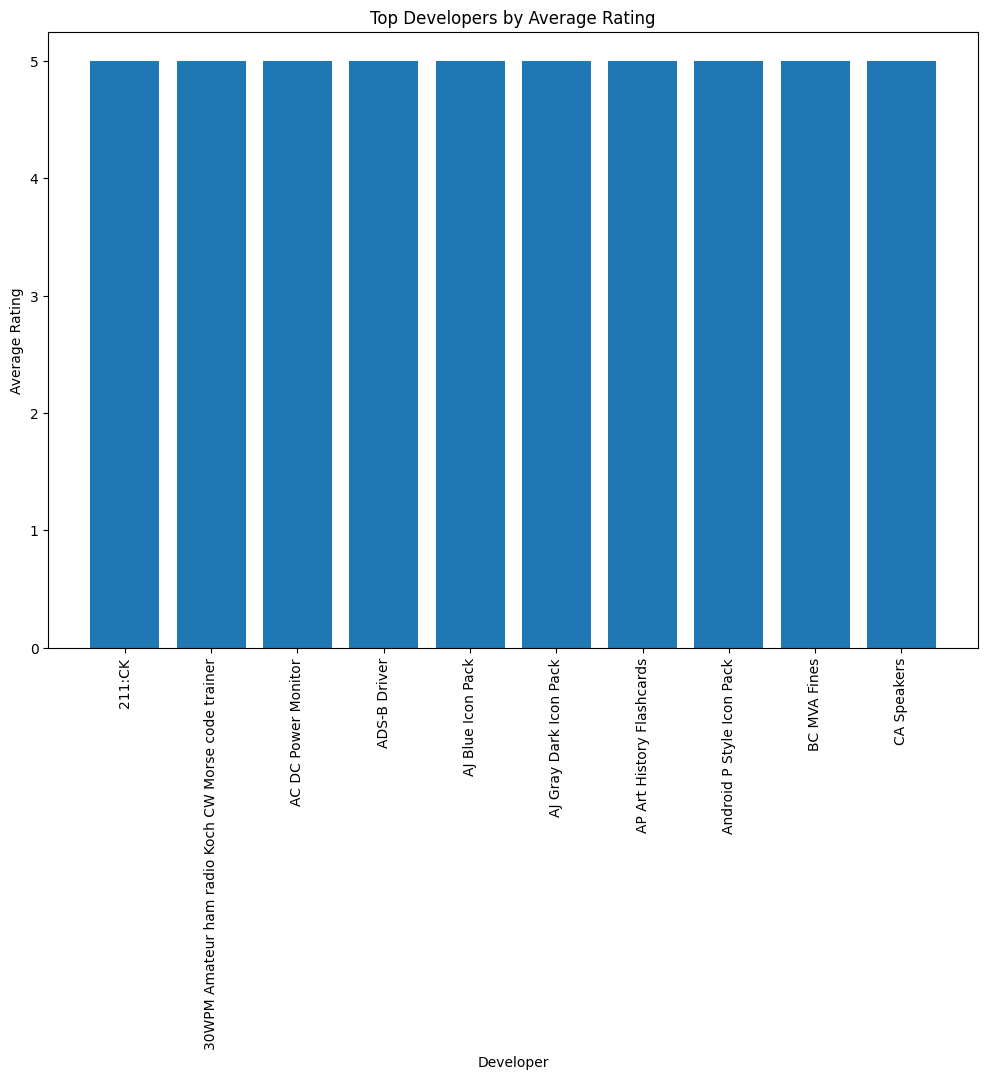

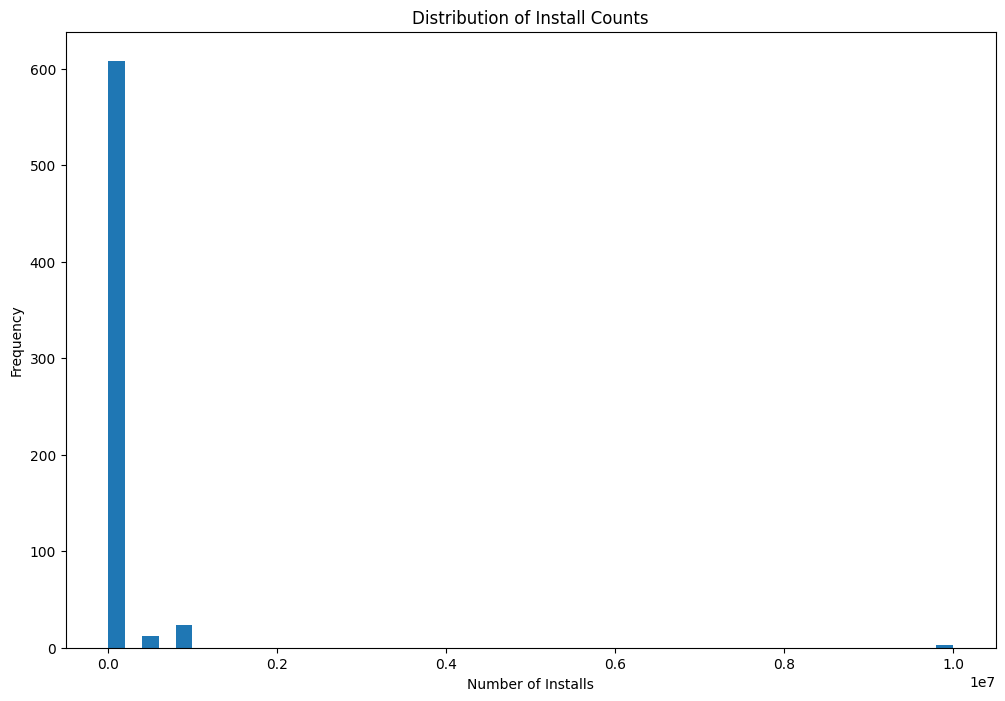

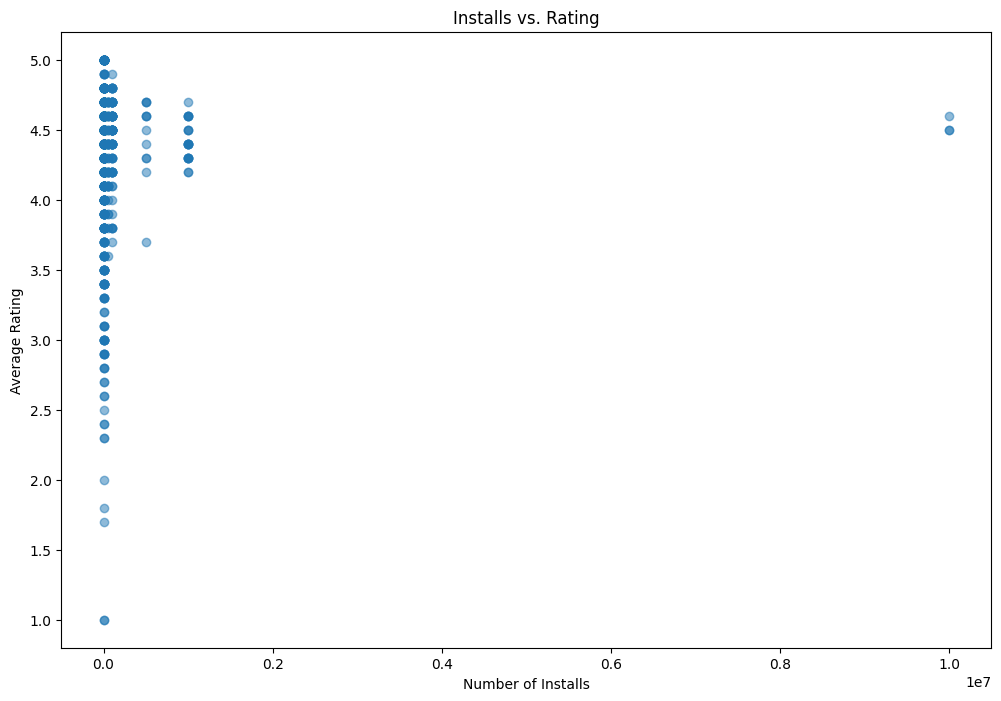

In [69]:

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df1 = pd.read_csv(url)

# Clean the data
df1 = df1.dropna(subset=['Type', 'Rating', 'Reviews', 'Installs', 'Category', 'App'])
df1 = df1[df1['Type'] == 'Paid']

# Remove '+' and ',' from 'Installs' and convert to int
df1['Installs'] = df1['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert 'Reviews' to int
df1['Reviews'] = df1['Reviews'].astype(int)

# Remove '$' from 'Price' and convert to float
df1['Price'] = df1['Price'].str.replace('$', '').astype(float)

# Group by Developer (assuming 'App' column represents the developer)
developer_stats = df1.groupby('App').agg({
    'Rating': 'mean',
    'Installs': 'sum',
    'Reviews': 'sum'
}).reset_index()

# Plotting bar chart of top developers by average rating
top_developers = developer_stats.nlargest(10, 'Rating')
plt.figure(figsize=(12, 8))
plt.bar(top_developers['App'], top_developers['Rating'])
plt.title('Top Developers by Average Rating')
plt.xlabel('Developer')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

# Histogram of install counts
plt.figure(figsize=(12, 8))
plt.hist(df1['Installs'], bins=50)
plt.title('Distribution of Install Counts')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of installs vs. rating
plt.figure(figsize=(12, 8))
plt.scatter(df1['Installs'], df1['Rating'], alpha=0.5)
plt.title('Installs vs. Rating')
plt.xlabel('Number of Installs')
plt.ylabel('Average Rating')
plt.show()


# Queston 17 : A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

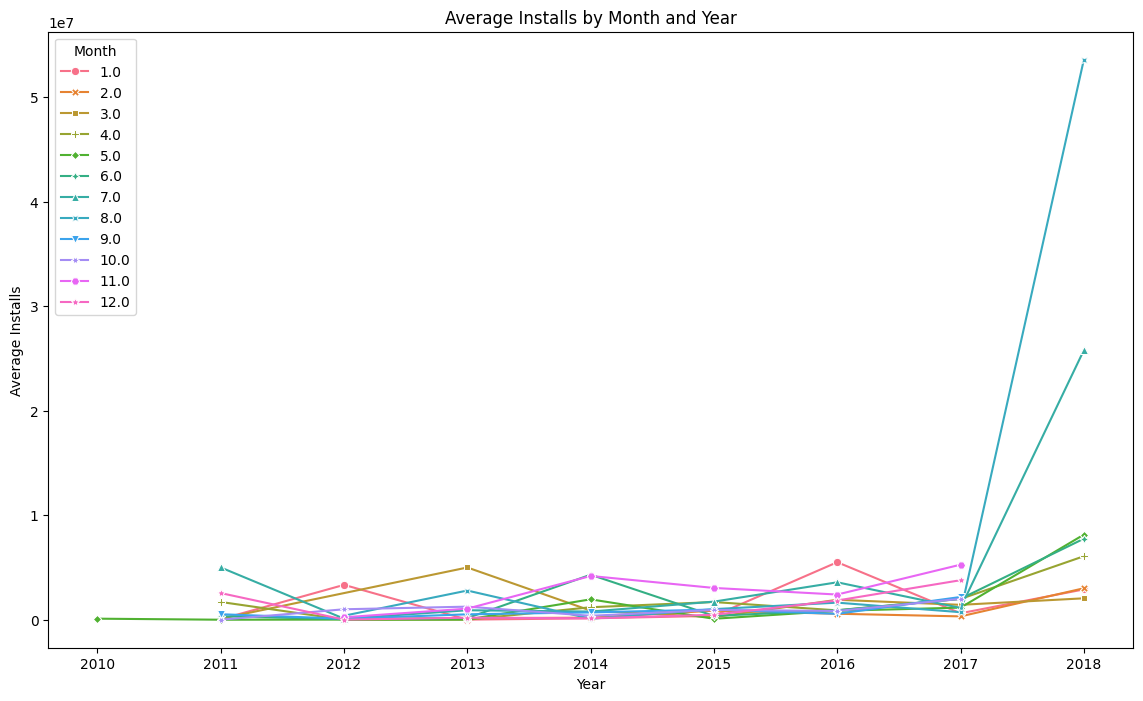

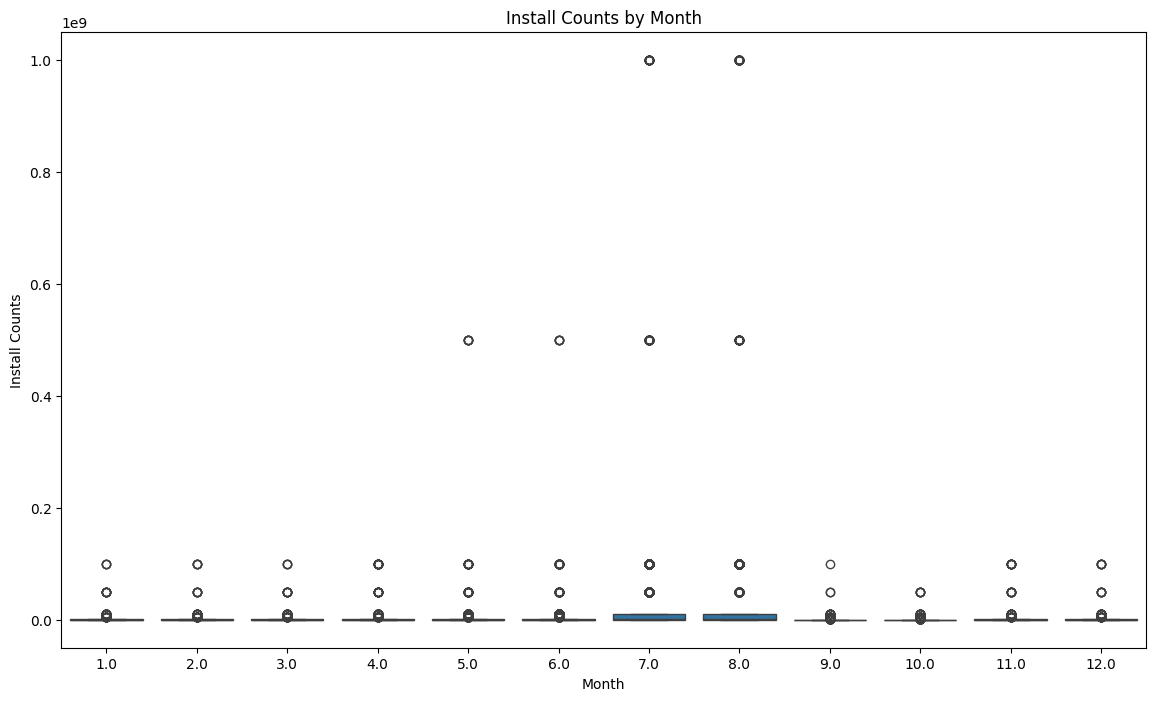

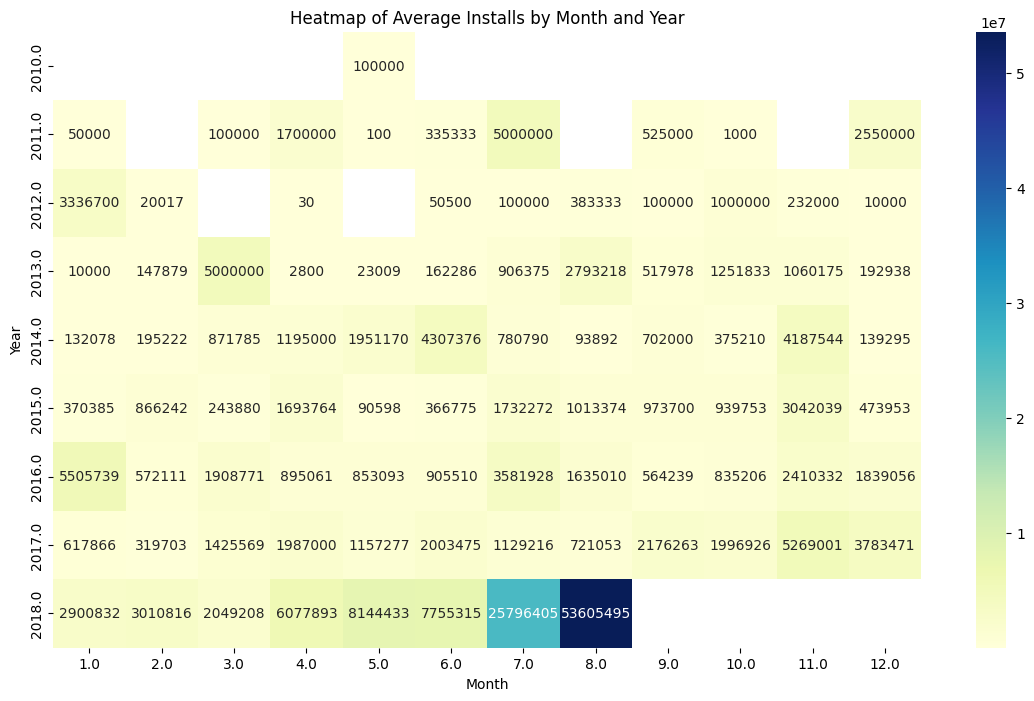

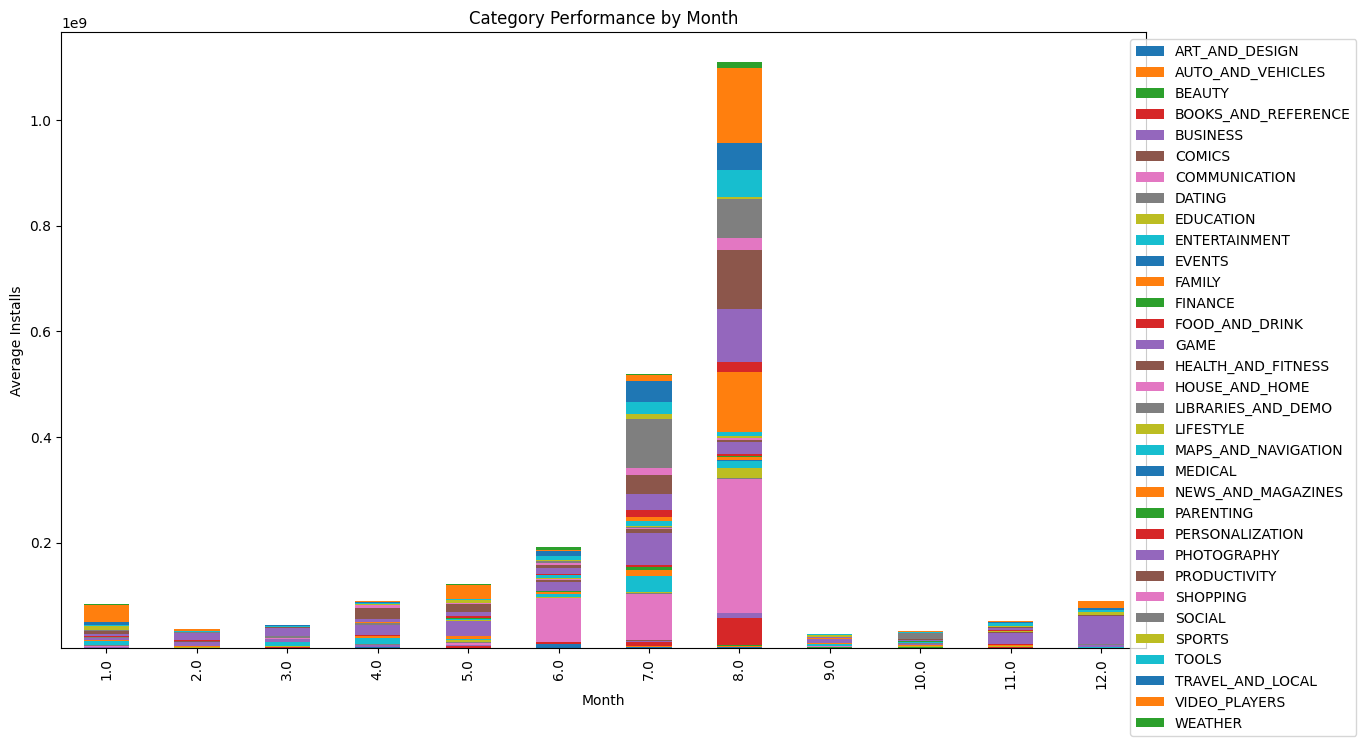

In [73]:

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df1 = pd.read_csv(url)

# Convert date columns to datetime
df1['Last Updated'] = pd.to_datetime(df1['Last Updated'], errors='coerce')

# Extract month and year from 'Last Updated'
df1['Month'] = df1['Last Updated'].dt.month
df1['Year'] = df1['Last Updated'].dt.year

# Filter data to include only non-null dates and positive installs
df1 = df1.dropna(subset=['Last Updated', 'Installs'])
df1 = df1[df1['Installs'] != 'Free']
df1['Installs'] = df1['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Time Series Analysis: Average installs by month and year
installs_by_month_year = df1.groupby(['Year', 'Month'])['Installs'].mean().unstack()

# Line Chart of Average Installs by Month/Year
plt.figure(figsize=(14, 8))
sns.lineplot(data=installs_by_month_year, markers=True, dashes=False)
plt.title('Average Installs by Month and Year')
plt.xlabel('Year')
plt.ylabel('Average Installs')
plt.show()

# Box Plot of Install Counts by Month
plt.figure(figsize=(14, 8))
sns.boxplot(x='Month', y='Installs', data=df1)
plt.title('Install Counts by Month')
plt.xlabel('Month')
plt.ylabel('Install Counts')
plt.show()

# Heatmap of Installs by Month and Year
plt.figure(figsize=(14, 8))
sns.heatmap(installs_by_month_year, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Heatmap of Average Installs by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Bar Chart of Category Performance by Month
category_monthly_installs = df1.groupby(['Month', 'Category'])['Installs'].mean().unstack()
category_monthly_installs.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Category Performance by Month')
plt.xlabel('Month')
plt.ylabel('Average Installs')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()
